In [69]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def preprocess(imagefile_path):
   byte_img = tf.io.read_file(imagefile_path)
   img = tf.io.decode_jpeg(byte_img, channels=3)
   return img

In [28]:
images = tf.data.Dataset.list_files(os.path.join('data', '*.png'), shuffle=False)
images = images.map(preprocess)

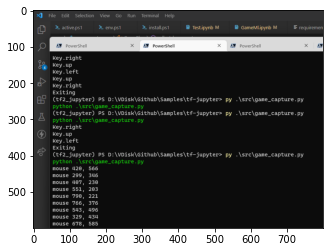

In [29]:
image1 = images.as_numpy_iterator().next()
#plt.imshow(preprocess(os.path.join('data', '6a650b96-1e34-11ed-a7d9-201e887f9b25.png')))
plt.imshow(image1)

In [72]:
def preprocess_keypress(file_path):
   keypress = tf.io.read_file(file_path)
   keys = tf.strings.split(keypress, '\r\n')
   if keys[0] == "None":
      return [0, 0, 0, 0]
   return keys[0, 0, 0, 0]

keypresses = tf.data.Dataset.list_files(os.path.join('data', '*.txt'), shuffle=False)
keypresses = keypresses.map(lambda x: tf.py_function(preprocess_keypress, [x], 
   [tf.int16, tf.int16, tf.int16, tf.int16]))

In [73]:
for x in keypresses.as_numpy_iterator():
   print(x)

(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)


In [81]:
dataset = tf.data.Dataset.zip((images, keypresses))

In [82]:
dataset = dataset.cache()
dataset = dataset.shuffle(40)
dataset = dataset.batch(8)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [83]:
x, y = dataset.as_numpy_iterator().next()

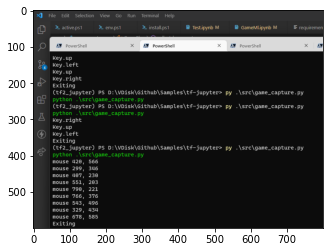

In [84]:
plt.imshow(x[0])

In [85]:
y

(array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int16),
 array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int16),
 array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int16),
 array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int16))